# S&P STOCK DATA

The S%P 500 stock dataset is the historical stock data for all current S&P 500 companies.The data includes how how prices change over time, graph to compare multiple stocks at once, or generate and graph new metrics from the data provided.From these data informative stock stats such as volatility and moving averages can be easily calculated.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set()
%matplotlib inline

In [64]:
#loading the data
df=pd.read_csv('all_stocks_5yr.csv')
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [20]:
df.shape

(619040, 7)

# DATA FIELDS DESCRIPTION

Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

# DATA MANIPULATION

In [21]:
#head of data
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [22]:
#tail of data
df.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [23]:
#structure of data
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [25]:
#the column date is stored as an object
#must be converted to datetime format
#convert from object to string
#converting using pandas.to_datetime()
df['date']=pd.to_datetime(df['date'])

In [26]:
#converted column date from an object to datetime datatype
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [27]:
#looking at numerical columns
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [28]:
#checking for missing values
df.isnull().any()
#no missing data found

date      False
open       True
high       True
low        True
close     False
volume    False
Name      False
dtype: bool

In [29]:
df.isnull().sum().sum()

27

In [30]:
mean_open=df['open'].mean()
mean_high=df['high'].mean()
mean_low=df['low'].mean()

In [31]:
df['open']=df['open'].fillna(mean_open)
df['high']=df['high'].fillna(mean_high)
df['low']=df['low'].fillna(mean_low)

In [32]:
#checking for missing values
df.isnull().any()
#no missing values

date      False
open      False
high      False
low       False
close     False
volume    False
Name      False
dtype: bool

AxesSubplot(0.125,0.125;0.775x0.755)


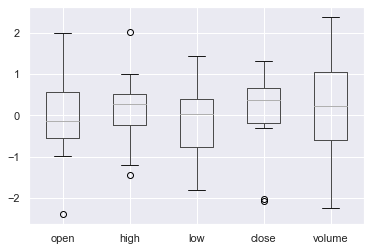

In [33]:
#checking for outliers in the data set
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(16,5), columns=['open','high','low','close','volume'])
boxplot = df.boxplot(column=['open','high','low','close','volume'])
print(boxplot)

#prescence of outliers from 3 columns

# EDA 

In [50]:
#months/years of data provided
df['date'].value_counts()

2015-09-21 23:00:00    1
2014-10-23 04:00:00    1
2013-01-17 18:00:00    1
2015-07-25 08:00:00    1
2014-09-18 06:00:00    1
                      ..
2013-10-14 21:00:00    1
2015-09-17 17:00:00    1
2015-10-02 05:00:00    1
2017-01-03 21:00:00    1
2013-06-07 22:00:00    1
Name: date, Length: 44089, dtype: int64

In [68]:
#how many no of stock
df['volume'].count()

619040

In [70]:
#descriptive stats for each stock
df['volume'].describe()

count    6.190400e+05
mean     4.321823e+06
std      8.693610e+06
min      0.000000e+00
25%      1.070320e+06
50%      2.082094e+06
75%      4.284509e+06
max      6.182376e+08
Name: volume, dtype: float64

In [71]:
#Overall max, min, avg, sd, variance, quantile across the time period
datetime_is_numeric=True
df['date'].describe()

count         619040
unique          1259
top       2018-01-19
freq             505
Name: date, dtype: object

In [65]:
#day when it reached the max
#maximum stock reached
max_stock =df['close'].max()
max_stock

2049.0

In [55]:
#day when maximum stock was reached
df.date[df.date == max_stock].index

Int64Index([], dtype='int64')

In [66]:
#Overall max, min, avg, sd, variance, quantile across the time period on daily returns, for this do daily difference
daily_returns = df['close'].pct_change()
daily_returns.head()

0         NaN
1   -0.019661
2   -0.013140
3    0.027330
4   -0.045703
Name: close, dtype: float64

In [67]:
#describing daily returns
daily_returns.describe()

count    619039.000000
mean          0.000543
std           0.046550
min          -0.987928
25%          -0.006809
50%           0.000631
75%           0.008106
max          19.664360
Name: close, dtype: float64

# VISUALIZATION


In [44]:
#time series plot for all the stock
date_rng = pd.date_range(start='1/1/2013', end='1/12/2018', freq='H')
type(date_rng[0])
#returns
pd._libs.tslib.Timestamp
df = pd.DataFrame(date_rng, columns=['date'])
df['volume'] = np.random.randint(0,100,size=(len(date_rng)))
df

,date,volume
0,2013-01-01 00:00:00,55
1,2013-01-01 01:00:00,36
2,2013-01-01 02:00:00,88
3,2013-01-01 03:00:00,33
4,2013-01-01 04:00:00,42
...,...,...
44084,2018-01-11 20:00:00,65
44085,2018-01-11 21:00:00,37
44086,2018-01-11 22:00:00,77
44087,2018-01-11 23:00:00,65


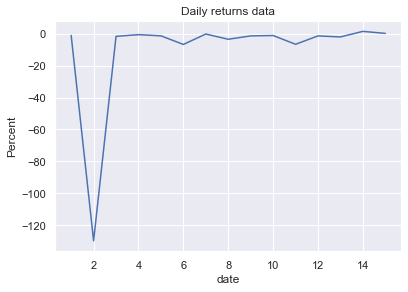

In [45]:
#Time series for all the stocks on return
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(daily_returns)
ax1.set_xlabel("date")
ax1.set_ylabel("Percent")
ax1.set_title("Daily returns data")
plt.show()


<AxesSubplot:>

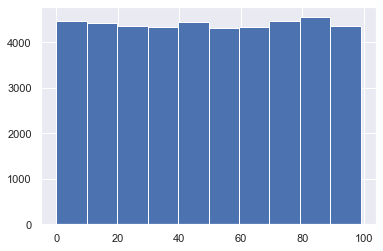

In [46]:
#histogram plots for all the stock
path = 'all_stocks_5yr.csv'
names = ['volume']
df['volume'].hist()

<AxesSubplot:>

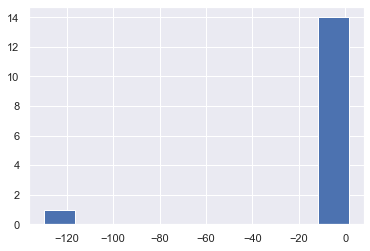

In [47]:
#Histogram for all the stock returns
name=['daily_returns']
daily_returns.hist()

In [48]:
#Scatter plot for number of shares sold vs value for each stock?
df.plot(x='daily_returns', y='close', style='o')

KeyError: 'daily_returns'

In [72]:
#Find the max value of each stock per month and year and pivot it
max_stock = df['close'].max()
max_stock

2049.0